In [130]:
### creating a svm model that predicts the presence of signal peptide after encoding the target sequences in a vector of 22 values (20 frequencies of residues, 1 value for position of maximum position hydrophobicity and 1 value for mean value of hydrophocity)

In [131]:
%pip install biopython
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [132]:
import pandas as pd
from sklearn import svm 
import numpy as np
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, confusion_matrix, matthews_corrcoef, accuracy_score, f1_score

### we expect to have Mean length of SPs in the training set of about about 22±5
### so we consider K ranging from 20 to 24 (moving K around the mean expected SP length) 

# SVM model:
### Creation of 5 cross validation sets for each round of training

In [3]:
%%bash
#round 1
#cat trainings2.text trainings3.text trainings4.text >> trainings234.text
#round 2
#cat trainings0.text trainings3.text trainings4.text >> trainings034.text
#round 3
#cat trainings0.text trainings1.text trainings4.text >> trainings014.text
#round 4
#cat trainings0.text trainings1.text trainings2.text >> trainings012.text
#round 5
#cat trainings1.text trainings2.text trainings3.text >> trainings123.text

In [4]:
%%bash
#final training round
#cat trainings0.text trainings1.text trainings2.text trainings3.text trainings4.text >> trainings01234.text

# Prepraring data files for the first round 
first cross validation dataset (trainings234),
Testing 80 combinations of parameters on validation dataset 1 (trainings1),
testing the model with the best combination of parameters on the testing dataset 0 (trainings0)

In [12]:
# creating dataframe of the cross validation dataset of the first round (trainings234)
df_training_234 = pd.read_csv('trainings234.tsv', sep='\t')

In [13]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_234.txt","w")
pept_pr1 = []
pept_label_234 = []
for i in df_training_234["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_234.append(0)
    else:
        pept_label_234.append(1)

for element in range(len(pept_label_234)):
    pept_label.write(str(pept_label_234[element]) + "\n")
print(len(pept_label_234))

9584


### Running the hp and frequency_hp programme on CROSS VALIDATION dataset (trainings234) with different k (20,21,22,23,24) to get a matrix of vectors with 22 values (20 values of frequencies for each residue and 1 value of maximum position hydrophobicity and 1 value of mean of hydrophobicity)

In [15]:
%%bash
#running hp.py programme to have a list with all the position of maximum hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings234.fasta 20 hp_20_1.text
python3 hp.py trainings234.fasta 21 hp_21_1.text
python3 hp.py trainings234.fasta 22 hp_22_1.text
python3 hp.py trainings234.fasta 23 hp_23_1.text
python3 hp.py trainings234.fasta 24 hp_24_1.text 

In [16]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings234.fasta 20 hp2_20_1.text
python3 hp2.py trainings234.fasta 21 hp2_21_1.text
python3 hp2.py trainings234.fasta 22 hp2_22_1.text
python3 hp2.py trainings234.fasta 23 hp2_23_1.text
python3 hp2.py trainings234.fasta 24 hp2_24_1.text 

In [17]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 21 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings234.fasta 20 X__hp_train20_1.text hp_20_1.text hp2_20_1.text
python3 frequency_hp2.py trainings234.fasta 21 X__hp_train21_1.text hp_21_1.text hp2_21_1.text
python3 frequency_hp2.py trainings234.fasta 22 X__hp_train22_1.text hp_22_1.text hp2_22_1.text
python3 frequency_hp2.py trainings234.fasta 23 X__hp_train23_1.text hp_23_1.text hp2_23_1.text
python3 frequency_hp2.py trainings234.fasta 24 X__hp_train24_1.text hp_24_1.text hp2_24_1.text

### Running the hp and frequency_hp programme on VALIDATION dataset (trainings1) with different k (20,21,22,23,24) to get a matrix of vectors with 22 values (20 values of frequencies for each residue and 1 value of maximum position hydrophobicity and 1 value for mean of Hydrophobicity)

In [133]:
%%bash
#running hp.py programme to have a list with all the position of maximum position hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings1.fasta 20 hp_20_1_test.text
python3 hp.py trainings1.fasta 21 hp_21_1_test.text
python3 hp.py trainings1.fasta 22 hp_22_1_test.text
python3 hp.py trainings1.fasta 23 hp_23_1_test.text
python3 hp.py trainings1.fasta 24 hp_24_1_test.text 

In [19]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings1.fasta 20 hp2_20_1_test.text
python3 hp2.py trainings1.fasta 21 hp2_21_1_test.text
python3 hp2.py trainings1.fasta 22 hp2_22_1_test.text
python3 hp2.py trainings1.fasta 23 hp2_23_1_test.text
python3 hp2.py trainings1.fasta 24 hp2_24_1_test.text 

In [134]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings1.fasta 20 X__hp_test20_1.text hp_20_1_test.text hp2_20_1_test.text 
python3 frequency_hp2.py trainings1.fasta 21 X__hp_test21_1.text hp_21_1_test.text hp2_21_1_test.text 
python3 frequency_hp2.py trainings1.fasta 22 X__hp_test22_1.text hp_22_1_test.text hp2_22_1_test.text 
python3 frequency_hp2.py trainings1.fasta 23 X__hp_test23_1.text hp_23_1_test.text hp2_23_1_test.text 
python3 frequency_hp2.py trainings1.fasta 24 X__hp_test24_1.text hp_24_1_test.text hp2_24_1_test.text 

In [78]:
# creating dataframe of the training1
df_training_1 = pd.read_csv('trainings1.tsv', sep='\t')

In [79]:
import pandas as pd

# Remove rows where "Entry" column equals "Q3LFD5" because obsolete protein not present in fasta file
df_training_1 = df_training_1[df_training_1["Entry"] != 'Q3LFD5']

In [80]:
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_1.txt","w")
pept_pr1 = []
pept_label_1 = []
for i in df_training_1["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_1.append(0)
    else:
        pept_label_1.append(1)
for element in range(len(pept_label_1)):
    pept_label.write(str(pept_label_1[element])+"\n")
print(len(pept_label_1))

3193


# Preparing data files for the second round 
second cross validation dataset (trainings034), Testing 80 combinations of parameters on validation dataset 2 (trainings2), testing the model with the best combination of parameters on the testing dataset 1 (trainings1)

In [24]:
# creating dataframe of the cross validation dataset of the second round (trainings034)
df_training_034 = pd.read_csv('trainings034.tsv', sep='\t')


In [25]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
pept_label = open("pept_label_034.txt","w")
pept_pr1 = []
pept_label_034 = []
for i in df_training_034["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_034.append(0)
    else:
        pept_label_034.append(1)
for element in range(len(pept_label_034)):
    pept_label.write(str(pept_label_034[element]) + "\n")

print(len(pept_label_034))

9585


In [135]:
%%bash
#running hp.py programme to have a list with all the maximum position hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings034.fasta 20 hp_20_2.text
python3 hp.py trainings034.fasta 21 hp_21_2.text
python3 hp.py trainings034.fasta 22 hp_22_2.text
python3 hp.py trainings034.fasta 23 hp_23_2.text
python3 hp.py trainings034.fasta 24 hp_24_2.text 

In [27]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings034.fasta 20 hp2_20_2.text
python3 hp2.py trainings034.fasta 21 hp2_21_2.text
python3 hp2.py trainings034.fasta 22 hp2_22_2.text
python3 hp2.py trainings034.fasta 23 hp2_23_2.text
python3 hp2.py trainings034.fasta 24 hp2_24_2.text 

In [136]:
%%bash
#running frequency_hp.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings034.fasta 20 X__hp_train20_2.text hp_20_2.text hp2_20_2.text 
python3 frequency_hp2.py trainings034.fasta 21 X__hp_train21_2.text hp_21_2.text hp2_21_2.text
python3 frequency_hp2.py trainings034.fasta 22 X__hp_train22_2.text hp_22_2.text hp2_22_2.text
python3 frequency_hp2.py trainings034.fasta 23 X__hp_train23_2.text hp_23_2.text hp2_23_2.text
python3 frequency_hp2.py trainings034.fasta 24 X__hp_train24_2.text hp_24_2.text hp2_24_2.text

In [137]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings2.fasta 20 hp_20_2_test.text
python3 hp.py trainings2.fasta 21 hp_21_2_test.text
python3 hp.py trainings2.fasta 22 hp_22_2_test.text
python3 hp.py trainings2.fasta 23 hp_23_2_test.text
python3 hp.py trainings2.fasta 24 hp_24_2_test.text  

In [30]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings2.fasta 20 hp2_20_2_test.text
python3 hp2.py trainings2.fasta 21 hp2_21_2_test.text
python3 hp2.py trainings2.fasta 22 hp2_22_2_test.text
python3 hp2.py trainings2.fasta 23 hp2_23_2_test.text
python3 hp2.py trainings2.fasta 24 hp2_24_2_test.text  

In [138]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the position of maximum and then average hydrophobicity value for each protein
python3 frequency_hp2.py trainings2.fasta 20 X__hp_test20_2.text hp_20_2_test.text hp2_20_2_test.text
python3 frequency_hp2.py trainings2.fasta 21 X__hp_test21_2.text hp_21_2_test.text hp2_21_2_test.text
python3 frequency_hp2.py trainings2.fasta 22 X__hp_test22_2.text hp_22_2_test.text hp2_22_2_test.text
python3 frequency_hp2.py trainings2.fasta 23 X__hp_test23_2.text hp_23_2_test.text hp2_23_2_test.text
python3 frequency_hp2.py trainings2.fasta 24 X__hp_test24_2.text hp_24_2_test.text hp2_24_2_test.text

In [84]:
# creating dataframe of the training2
df_training_2 = pd.read_csv('trainings2.tsv', sep='\t')

In [85]:
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_2.txt","w")
pept_pr2 = []
pept_label_2 = []
for i in df_training_2["Signal peptide"]:
    pept_pr2.append(str(i))
for j in range(len(pept_pr2)):
    if pept_pr2[j] == "nan" :
        pept_label_2.append(0)
    else:
        pept_label_2.append(1)
#pept_label_2.pop(-1)
for element in range(len(pept_label_2)):
    pept_label.write(str(pept_label_2[element])+"\n")
len(pept_label_2)

3193

#  Preparing data files for the third round 
Third cross validation dataset (trainings014), Testing 80 combinations of parameters on validation dataset 3 (trainings3), testing the model with the best combination of parameters on the testing dataset 2 (trainings2)

In [34]:
# creating dataframe of the cross validation dataset of the second round (trainings034)
df_training_014 = pd.read_csv('trainings014.tsv', sep='\t')

In [35]:
import pandas as pd

# Remove rows where "Entry" column equals "Q3LFD5" because obsolete protein not present in fasta file
df_training_014 = df_training_014[df_training_014["Entry"] != 'Q3LFD5']

In [36]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
pept_label = open("pept_label_014.txt","w")
pept_pr1 = []
pept_label_014 = []
for i in df_training_014["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_014.append(0)
    else:
        pept_label_014.append(1)
for element in range(len(pept_label_014)):
    pept_label.write(str(pept_label_014[element]) + "\n")
len(pept_label_014)

9584

In [37]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings014.fasta 20 hp_20_3.text
python3 hp.py trainings014.fasta 21 hp_21_3.text
python3 hp.py trainings014.fasta 22 hp_22_3.text
python3 hp.py trainings014.fasta 23 hp_23_3.text
python3 hp.py trainings014.fasta 24 hp_24_3.text 

In [38]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings014.fasta 20 hp2_20_3.text
python3 hp2.py trainings014.fasta 21 hp2_21_3.text
python3 hp2.py trainings014.fasta 22 hp2_22_3.text
python3 hp2.py trainings014.fasta 23 hp2_23_3.text
python3 hp2.py trainings014.fasta 24 hp2_24_3.text 

In [139]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings014.fasta 20 X__hp_train20_3.text hp_20_3.text hp2_20_3.text
python3 frequency_hp2.py trainings014.fasta 21 X__hp_train21_3.text hp_21_3.text hp2_20_3.text
python3 frequency_hp2.py trainings014.fasta 22 X__hp_train22_3.text hp_22_3.text hp2_20_3.text
python3 frequency_hp2.py trainings014.fasta 23 X__hp_train23_3.text hp_23_3.text hp2_20_3.text
python3 frequency_hp2.py trainings014.fasta 24 X__hp_train24_3.text hp_24_3.text hp2_20_3.text

In [140]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity position values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings3.fasta 20 hp_20_3_test.text
python3 hp.py trainings3.fasta 21 hp_21_3_test.text
python3 hp.py trainings3.fasta 22 hp_22_3_test.text
python3 hp.py trainings3.fasta 23 hp_23_3_test.text
python3 hp.py trainings3.fasta 24 hp_24_3_test.text

In [41]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings3.fasta 20 hp2_20_3_test.text
python3 hp2.py trainings3.fasta 21 hp2_21_3_test.text
python3 hp2.py trainings3.fasta 22 hp2_22_3_test.text
python3 hp2.py trainings3.fasta 23 hp2_23_3_test.text
python3 hp2.py trainings3.fasta 24 hp2_24_3_test.text

In [141]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings3.fasta 20 X__hp_test20_3.text hp_20_3_test.text hp2_20_3_test.text
python3 frequency_hp2.py trainings3.fasta 21 X__hp_test21_3.text hp_21_3_test.text hp2_21_3_test.text
python3 frequency_hp2.py trainings3.fasta 22 X__hp_test22_3.text hp_22_3_test.text hp2_22_3_test.text
python3 frequency_hp2.py trainings3.fasta 23 X__hp_test23_3.text hp_23_3_test.text hp2_23_3_test.text
python3 frequency_hp2.py trainings3.fasta 24 X__hp_test24_3.text hp_24_3_test.text hp2_24_3_test.text

In [43]:
# creating dataframe of the training3
df_training_3 = pd.read_csv('trainings3.tsv', sep='\t')

In [44]:
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_3.txt","w")
pept_pr3 = []
pept_label_3 = []
for i in df_training_3["Signal peptide"]:
    pept_pr3.append(str(i))
for j in range(len(pept_pr3)):
    if pept_pr3[j] == "nan" :
        pept_label_3.append(0)
    else:
        pept_label_3.append(1)
#pept_label_3.pop(-1)
for element in range(len(pept_label_3)):
    pept_label.write(str(pept_label_3[element])+"\n")
len(pept_label_3)

3194

#  Preparing data files for the fourth round 
fourth cross validation dataset (trainings012), Testing 80 combinations of parameters on validation dataset 4 (trainings4), testing the model with the best combination of parameters on the testing dataset 3 (trainings3)

In [45]:
# creating dataframe of the cross validation dataset of the second round (trainings014)
df_training_012 = pd.read_csv('trainings012.tsv', sep='\t')

In [46]:
import pandas as pd

# Remove rows where "Entry" column equals "Q3LFD5" because obsolete protein not present in fasta file
df_training_012 = df_training_012[df_training_012["Entry"] != 'Q3LFD5']


In [47]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
pept_label = open("pept_label_012.txt","w")
pept_pr1 = []
pept_label_012 = []
for i in df_training_012["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_012.append(0)
    else:
        pept_label_012.append(1)
for element in range(len(pept_label_012)):
    pept_label.write(str(pept_label_012[element]) + "\n")
len(pept_label_012)

9580

In [48]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings012.fasta 20 hp_20_4.text
python3 hp.py trainings012.fasta 21 hp_21_4.text
python3 hp.py trainings012.fasta 22 hp_22_4.text
python3 hp.py trainings012.fasta 23 hp_23_4.text
python3 hp.py trainings012.fasta 24 hp_24_4.text 

In [49]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings012.fasta 20 hp2_20_4.text
python3 hp2.py trainings012.fasta 21 hp2_21_4.text
python3 hp2.py trainings012.fasta 22 hp2_22_4.text
python3 hp2.py trainings012.fasta 23 hp2_23_4.text
python3 hp2.py trainings012.fasta 24 hp2_24_4.text

In [142]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings012.fasta 20 X__hp_train20_4.text hp_20_4.text hp2_20_4.text
python3 frequency_hp2.py trainings012.fasta 21 X__hp_train21_4.text hp_21_4.text hp2_21_4.text
python3 frequency_hp2.py trainings012.fasta 22 X__hp_train22_4.text hp_22_4.text hp2_22_4.text
python3 frequency_hp2.py trainings012.fasta 23 X__hp_train23_4.text hp_23_4.text hp2_23_4.text
python3 frequency_hp2.py trainings012.fasta 24 X__hp_train24_4.text hp_24_4.text hp2_24_4.text

In [51]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings4.fasta 20 hp_20_4_test.text
python3 hp.py trainings4.fasta 21 hp_21_4_test.text
python3 hp.py trainings4.fasta 22 hp_22_4_test.text
python3 hp.py trainings4.fasta 23 hp_23_4_test.text
python3 hp.py trainings4.fasta 24 hp_24_4_test.text

In [52]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings4.fasta 20 hp2_20_4_test.text
python3 hp2.py trainings4.fasta 21 hp2_21_4_test.text
python3 hp2.py trainings4.fasta 22 hp2_22_4_test.text
python3 hp2.py trainings4.fasta 23 hp2_23_4_test.text
python3 hp2.py trainings4.fasta 24 hp2_24_4_test.text

In [53]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 21 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings4.fasta 20 X__hp_test20_4.text hp_20_4_test.text hp2_20_4_test.text
python3 frequency_hp2.py trainings4.fasta 21 X__hp_test21_4.text hp_21_4_test.text hp2_21_4_test.text
python3 frequency_hp2.py trainings4.fasta 22 X__hp_test22_4.text hp_22_4_test.text hp2_22_4_test.text
python3 frequency_hp2.py trainings4.fasta 23 X__hp_test23_4.text hp_23_4_test.text hp2_23_4_test.text
python3 frequency_hp2.py trainings4.fasta 24 X__hp_test24_4.text hp_24_4_test.text hp2_24_4_test.text

In [54]:
# creating dataframe of the training4
df_training_4 = pd.read_csv('trainings4.tsv', sep='\t')

In [55]:
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_4.txt","w")
pept_pr4 = []
pept_label_4 = []
for i in df_training_4["Signal peptide"]:
    pept_pr4.append(str(i))
for j in range(len(pept_pr4)):
    if pept_pr4[j] == "nan" :
        pept_label_4.append(0)
    else:
        pept_label_4.append(1)
#pept_label_3.pop(-1)
for element in range(len(pept_label_4)):
    pept_label.write(str(pept_label_4[element])+"\n")
len(pept_label_4)

3197

# Preparing data files for the fifth round 
fifth cross validation dataset (trainings123), Testing 80 combinations of parameters on validation dataset 0 (trainings0), testing the model with the best combination of parameters on the testing dataset 4 (trainings4)

In [67]:
# creating dataframe of the cross validation dataset of the second round (trainings014)
df_training_123 = pd.read_csv('trainings123.tsv', sep='\t')

In [68]:
# Remove rows where "Entry" column equals "Q3LFD5" because obsolete protein not present in fasta file
df_training_123 = df_training_123[df_training_123["Entry"] != 'Q3LFD5']


In [69]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
pept_label = open("pept_label_123.txt","w")
pept_pr1 = []
pept_label_123 = []
for i in df_training_123["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_123.append(0)
    else:
        pept_label_123.append(1)
for element in range(len(pept_label_123)):
    pept_label.write(str(pept_label_123[element]) + "\n")
len(pept_label_123)

9580

In [59]:
%%bash
grep ">" trainings123.fasta| wc

   9580  118393 1098842


In [70]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity position values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings123.fasta 20 hp_20_5.text
python3 hp.py trainings123.fasta 21 hp_21_5.text
python3 hp.py trainings123.fasta 22 hp_22_5.text
python3 hp.py trainings123.fasta 23 hp_23_5.text
python3 hp.py trainings123.fasta 24 hp_24_5.text 

In [71]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity position values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings123.fasta 20 hp2_20_5.text
python3 hp2.py trainings123.fasta 21 hp2_21_5.text
python3 hp2.py trainings123.fasta 22 hp2_22_5.text
python3 hp2.py trainings123.fasta 23 hp2_23_5.text
python3 hp2.py trainings123.fasta 24 hp2_24_5.text 

In [72]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings123.fasta 20 X__hp_train20_5.text hp_20_5.text hp2_20_5.text
python3 frequency_hp2.py trainings123.fasta 21 X__hp_train21_5.text hp_21_5.text hp2_21_5.text
python3 frequency_hp2.py trainings123.fasta 22 X__hp_train22_5.text hp_22_5.text hp2_22_5.text
python3 frequency_hp2.py trainings123.fasta 23 X__hp_train23_5.text hp_23_5.text hp2_23_5.text
python3 frequency_hp2.py trainings123.fasta 24 X__hp_train24_5.text hp_24_5.text hp2_24_5.text

In [73]:
%%bash
#running hp.py programme to have a list with all the maximum hydrophobicity position values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp.py trainings0.fasta 20 hp_20_5_test.text
python3 hp.py trainings0.fasta 21 hp_21_5_test.text
python3 hp.py trainings0.fasta 22 hp_22_5_test.text
python3 hp.py trainings0.fasta 23 hp_23_5_test.text
python3 hp.py trainings0.fasta 24 hp_24_5_test.text

In [74]:
%%bash
#running hp2.py programme to have a list with all the average hydrophobicity values 
#this programme takes in input the dataset of proteins, k hyperparameter 
python3 hp2.py trainings0.fasta 20 hp2_20_5_test.text
python3 hp2.py trainings0.fasta 21 hp2_21_5_test.text
python3 hp2.py trainings0.fasta 22 hp2_22_5_test.text
python3 hp2.py trainings0.fasta 23 hp2_23_5_test.text
python3 hp2.py trainings0.fasta 24 hp2_24_5_test.text

In [75]:
%%bash
#running frequency_hp2.py programme to have a matrix of vectors: each sequence(in the range of k) for each protein is encoded in a vector of 22 values (frequencies of aminoacids + maximum hydrophobicity value)
#this programme takes in input the dataset of proteins, k hyperparameter and a file with the maximum position and average hydrophobicity value for each protein
python3 frequency_hp2.py trainings0.fasta 20 X__hp_test20_5.text hp_20_5_test.text hp2_20_5_test.text 
python3 frequency_hp2.py trainings0.fasta 21 X__hp_test21_5.text hp_21_5_test.text hp2_21_5_test.text 
python3 frequency_hp2.py trainings0.fasta 22 X__hp_test22_5.text hp_22_5_test.text hp2_22_5_test.text
python3 frequency_hp2.py trainings0.fasta 23 X__hp_test23_5.text hp_23_5_test.text hp2_23_5_test.text 
python3 frequency_hp2.py trainings0.fasta 24 X__hp_test24_5.text hp_24_5_test.text hp2_24_5_test.text

### running SVM_training_testing.py programme to train my model with each X_train file for each k with every combination of gamma and C values using kernel rbf and predict on each X_test file for each k the presence of the peptide in every sequence
### the output is a file with each prediction for every combination of parameters on X_train file and X_test file with a certain k value
### this python programme trains the model with cross validation dataset, test it on validation test and the results is the prediction,input1 contains the matrix from cross validation dataset,input2 contains the matrix from validation dataset,input3 contains the output of the prediction on validation test¶

In [76]:
%%bash
python3 SVM_training_testing-hp.py

In [128]:
%%bash
#computing the mcc for each prediction for each parameters value for each round
python3 SVM_mcc-Copy1.py

In [129]:
%%bash
#all best combinations for each k for each round
python3 all_combinations.py

## the best combination of each round is:

#### round1['k:20 C:4 gamma:0.5 max mcc:0.6128561578936451']
#### round2['k:20 C:8 gamma:scale max mcc:0.7094313414364609']
#### round3['k:22 C:4 gamma:2 max mcc:0.8012975249829527']
#### round4['k:20 C:1 gamma:1 max mcc:0.6918858398955121']
#### round5['k:20 C:1 gamma:2 max mcc:0.7108258453981381']

## round1: Testing the best combination on testing dataset (trainings0) 

In [91]:
%%bash
python3 hp.py trainings0.fasta 20 hp_20_final.text

In [92]:
%%bash
python3 hp2.py trainings0.fasta 20 hp2_20_final.text

In [93]:
%%bash
python3 frequency_hp2.py trainings0.fasta 20 X_test20_final_round1.text hp_20_final.text hp2_20_final.text

In [125]:
# creating dataframe of the training0
df_training_0 = pd.read_csv('trainings0.tsv', sep='\t')

In [126]:
#creating a file with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_label = open("pept_label_5.txt","w")
pept_pr0 = []
pept_label_5 = []
for i in df_training_0["Signal peptide"]:
    pept_pr0.append(str(i))
for j in range(len(pept_pr0)):
    if pept_pr0[j] == "nan" :
        pept_label_5.append(0)
    else:
        pept_label_5.append(1)
pept_label_5.pop(-1)
for element in range(len(pept_label_5)):
    pept_label.write(str(pept_label_5[element])+"\n")

In [127]:
print(len(pept_label_5))

3193


In [97]:
#the best combination with k=20 is C = 4 and gamma = 0.5
#let's test on testing dataset round1
X_train_file = open("X__hp_train20_1.text","r")
X_test_file = open("X_test20_final_round1.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C=4, kernel='rbf', gamma= 0.5 )
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_234)
# Predict classes on testing data
y_pred_round1 = mySVC.predict(X_test)

In [98]:
mcc_round1 = matthews_corrcoef(pept_label_5, y_pred_round1)
mcc_round1

0.7208768391531789

In [99]:
precision1 = precision_score(pept_label_5, y_pred_round1)
recall1 = recall_score(pept_label_5, y_pred_round1)
accuracy1 = accuracy_score(pept_label_5, y_pred_round1)
print("precision: ", precision1,"recall: ", recall1,"accuracy: ", accuracy1)

precision:  0.6434426229508197 recall:  0.8486486486486486 accuracy:  0.9639837143751957


## round2: Testing the best combination on testing dataset (trainings1) 

In [100]:
%%bash
python3 hp.py trainings1.fasta 20 hp_20_final_2.text

In [101]:
%%bash
python3 hp2.py trainings1.fasta 20 hp2_20_final_2.text

In [102]:
%%bash
python3 frequency_hp2.py trainings1.fasta 20 X_test20_final_round2.text hp_20_final_2.text hp2_20_final_2.text

In [103]:
#the best combination with k=20 is C = 8 and gamma = scale
#let's test on testing dataset round2
X_train_file = open("X__hp_train20_2.text","r")
X_test_file = open("X_test20_final_round2.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C=8, kernel='rbf', gamma="scale")
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_034)
# Predict classes on testing data
y_pred_round2 = mySVC.predict(X_test)

In [104]:
mcc_round2 = matthews_corrcoef(pept_label_1, y_pred_round2)
mcc_round2

0.6043726079818575

In [105]:
precision2 = precision_score(pept_label_1, y_pred_round2)
recall2 = recall_score(pept_label_1, y_pred_round2)
accuracy2 = accuracy_score(pept_label_1, y_pred_round2)
print("precision: ", precision2,"recall: ", recall2,"accuracy: ", accuracy2)

precision:  0.8148148148148148 recall:  0.4731182795698925 accuracy:  0.963044159098027


## round3: Testing the best combination on testing dataset (trainings2) 

In [106]:
%%bash
python3 hp.py trainings2.fasta 22 hp_22_final_3.text

In [107]:
%%bash
python3 hp2.py trainings2.fasta 22 hp2_22_final_3.text

In [108]:
%%bash
python3 frequency_hp2.py trainings2.fasta 22 X_test22_final_round3.text hp_22_final_3.text hp2_22_final_3.text

In [109]:
#the best combination with k=22 is C = 4 and gamma = 2
#let's test on testing dataset round3
X_train_file = open("X__hp_train22_3.text","r")
X_test_file = open("X_test22_final_round3.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C=4, kernel='rbf', gamma= 2)
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_014)
# Predict classes on testing data
y_pred_round3 = mySVC.predict(X_test)

In [110]:
mcc_round3 = matthews_corrcoef(pept_label_2, y_pred_round3)
mcc_round3

0.6589072699478473

In [111]:
precision3 = precision_score(pept_label_2, y_pred_round3)
recall3 = recall_score(pept_label_2, y_pred_round3)
accuracy3 = accuracy_score(pept_label_2, y_pred_round3)
print("precision: ", precision3,"recall: ", recall3,"accuracy: ", accuracy3)

precision:  0.6615384615384615 recall:  0.6972972972972973 accuracy:  0.9617914187284685


## round4: Testing the best combination on testing dataset (trainings3) 

In [112]:
%%bash
python3 hp.py trainings3.fasta 20 hp_20_final_4.text

In [113]:
%%bash
python3 hp2.py trainings3.fasta 20 hp2_20_final_4.text

In [114]:
%%bash
python3 frequency_hp2.py trainings3.fasta 20 X_test20_final_round4.text hp_20_final_4.text hp2_20_final_4.text

In [115]:
#the best combination with k=20 is C = 8 and gamma = 0.5
#let's test on testing dataset round4
X_train_file = open("X__hp_train20_4.text","r")
X_test_file = open("X_test20_final_round4.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C = 1, kernel='rbf', gamma = 1)
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_012)
# Predict classes on testing data
y_pred_round4 = mySVC.predict(X_test)

In [116]:
mcc_round4 = matthews_corrcoef(pept_label_3, y_pred_round4)
mcc_round4

0.7031203074705277

In [117]:
precision4 = precision_score(pept_label_3, y_pred_round4)
recall4 = recall_score(pept_label_3, y_pred_round4)
accuracy4 = accuracy_score(pept_label_3, y_pred_round4)
print("precision: ", precision4,"recall: ", recall4,"accuracy: ", accuracy4)

precision:  0.8 recall:  0.6451612903225806 accuracy:  0.9699436443331246


## round5: Testing the best combination on testing dataset (trainings4) 

In [118]:
%%bash
python3 hp.py trainings4.fasta 20 hp_20_final_5.text

In [119]:
%%bash
python3 hp2.py trainings4.fasta 20 hp2_20_final_5.text

In [120]:
%%bash
python3 frequency_hp2.py trainings4.fasta 20 X_test20_final_round5.text hp_20_final_5.text hp2_20_final_5.text

In [121]:
#the best combination with k=20 is C = 1 and gamma = 2
#let's test on testing dataset round5
X_train_file = open("X__hp_train20_5.text","r")
X_test_file = open("X_test20_final_round5.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C=1, kernel='rbf', gamma=2)
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_123)
# Predict classes on testing data
y_pred_round5 = mySVC.predict(X_test)

In [122]:
mcc_round5 = matthews_corrcoef(pept_label_4, y_pred_round5)
mcc_round5

0.6806609220342275

In [138]:
precision5 = precision_score(pept_label_4, y_pred_round5)
recall5 = recall_score(pept_label_4, y_pred_round5)
accuracy5 = accuracy_score(pept_label_4, y_pred_round5)
print("precision: ", precision5,"recall: ", recall5,"accuracy: ", accuracy5)

precision:  0.6015625 recall:  0.8191489361702128 accuracy:  0.9574601188614326


In [196]:
#computing mean and standard deviation with the data for the 5 rounds:
data_mcc =np.array([0.7208768391531789,0.6043726079818575,0.6589072699478473,0.7031203074705277,0.6806609220342275])
data_accuracy = np.array([accuracy1,accuracy2,accuracy3,accuracy4,accuracy5])
precision = [precision1,precision2,precision3,precision4,precision5]
recall = [recall1,recall2,recall3,recall4,recall5]
f1_score =[]
for i in range(len(recall)):
    f1_score.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
data_precision = np.array(precision)
data_recall = np.array(recall)
data_f1_Score = np.array(f1_score)
mean_f1_Score = np.mean(f1_score)
std_f1_Score = np.std(f1_score)
mean_value_mcc = np.mean(data_mcc)
std_deviation_mcc = np.std(data_mcc)
mean_value_acc = np.mean(data_accuracy)
std_deviation_acc = np.std(data_accuracy)
mean_value_prec = np.mean(data_precision)
std_deviation_prec = np.std(data_precision)
mean_value_recall = np.mean(data_recall)
std_deviation_recall = np.std(data_recall)

In [197]:
print(mean_value_mcc)
print(std_deviation_mcc)

0.6735875893175278
0.040409682120346575


In [198]:
print(mean_value_acc)
print(std_deviation_acc)

0.9632446110792496
0.004025807234375051


In [145]:
print(mean_value_prec)
print(std_deviation_prec)

0.7042716798608192
0.08655538539288601


In [146]:
print(mean_value_recall)
print(std_deviation_recall)

0.6966748904017263
0.13470524244636442


In [170]:
print(mean_f1_Score)
print(std_f1_Score)

0.6835001928235009
0.04608607874797244


### the best combination for this model is k=20, C=1, gamma = 2

### training on whole training set + testing on bechmarking (blind set)

In [71]:
%%bash
python3 hp.py full_training.fasta 20 hp_20_final_train.text

In [72]:
%%bash
python3 hp2.py full_training.fasta 20 hp2_20_final_train.text

In [73]:
%%bash
python3 frequency_hp2.py full_training.fasta 20 X_train20_final_round_t.text hp_20_final_train.text hp2_20_final_train.text 

In [74]:
%%bash
python3 hp.py benchmarking_posneg.fasta 20 hp_20_final_b.text

In [75]:
%%bash
python3 hp2.py benchmarking_posneg.fasta 20 hp2_20_final_b.text

In [76]:
%%bash
python3 frequency_hp2.py benchmarking_posneg.fasta 20 X_test20_final_round_b.text hp_20_final_b.text hp2_20_final_b.text 

In [77]:
# final round with full postive training set and testing with benchmarking set
df_trainp2 = pd.read_csv('full_training.tsv', sep='\t')

In [78]:
# Remove rows where "Entry" column equals "Q3LFD5" because obsolete protein not present in fasta file
df_trainp2 = df_trainp2[df_trainp2["Entry"] != 'Q3LFD5']

In [79]:
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for cross validation
pept_pr_train = []
pept_label_train= []
for i in df_trainp2["Signal peptide"]:
    pept_pr_train.append(str(i))
for j in range(len(pept_pr_train)):
    if pept_pr_train[j] == "nan" :
        pept_label_train.append(0)
    else:
        pept_label_train.append(1)
len(pept_label_train)

15971

In [80]:
# creating dataframe of the benchmarking dataset for the final round
df_training_b = pd.read_csv('benchmarking_posneg.tsv', sep='\t')

In [81]:
#final round
#creating a list with the labeling of the proteins containing or not containing the signal peptide in the subset for validation
pept_pr1 = []
pept_label_b = []
for i in df_training_b["Signal peptide"]:
    pept_pr1.append(str(i))
for j in range(len(pept_pr1)):
    if pept_pr1[j] == "nan" :
        pept_label_b.append(0)
    else:
        pept_label_b.append(1)

In [82]:
#the best combination with k=20 is C = 1 and gamma = 2
#let's test on benchmarking set
X_train_file = open("X_train20_final_round_t.text","r")
X_test_file = open("X_test20_final_round_b.text","r")
X_train = []
X_test = []
for element in X_train_file:
    X_train.append(element.split())
for element1 in X_test_file:
    X_test.append(element1.split())
mySVC = svm.SVC(C=1, kernel='rbf', gamma= 2)
# Train (fit) the model on training data
mySVC.fit(X_train, pept_label_train)
# Predict classes on testing data
y_pred_round_b = mySVC.predict(X_test)

In [83]:
mcc_roundb = matthews_corrcoef(pept_label_b, y_pred_round_b)
mcc_roundb

0.7239659434390346

In [84]:
confusion_matrix_result_b = confusion_matrix(pept_label_b, y_pred_round_b)

In [ ]:
#false negative: 56, false positive: 18

In [173]:
precision = precision_score(pept_label_b, y_pred_round_b)
recall = recall_score(pept_label_b, y_pred_round_b)
accuracy = accuracy_score(pept_label_b, y_pred_round_b)
print("precision: ", precision,"recall: ", recall,"accuracy: ", accuracy)

precision:  0.8524590163934426 recall:  0.65 accuracy:  0.9597826086956521


In [175]:
F1_Scoreb = 2 * (precision * recall) / (precision + recall)

In [176]:
F1_Scoreb

0.7375886524822695

In [159]:
confusion_matrix_result_b
#56 false negative, #18 false positive

array([[1662,   18],
       [  56,  104]])

In [178]:
false_pos = []
false_neg = []
true_neg = []
true_pos = []
for i in range (len(pept_label_b)):
    if pept_label_b[i] == 0:
        if y_pred_round_b[i] != 0:
            false_pos.append(i)
        if y_pred_round_b[i] == 0:
            true_neg.append(i)
    if pept_label_b[i] == 1:
        if y_pred_round_b[i] != 1:
            false_neg.append(i)
        if y_pred_round_b[i] == 1:
            true_pos.append(i)

In [179]:
print("fp: ", false_pos)
print("fn: ", false_neg)

fp:  [219, 287, 294, 373, 488, 496, 542, 644, 672, 682, 983, 1066, 1225, 1280, 1357, 1612, 1828, 1836]
fn:  [1, 3, 9, 10, 14, 18, 19, 31, 33, 35, 37, 38, 39, 40, 45, 47, 49, 51, 56, 57, 60, 61, 63, 65, 69, 75, 81, 82, 85, 86, 87, 89, 90, 95, 99, 103, 104, 106, 113, 115, 117, 121, 122, 126, 129, 130, 132, 139, 140, 142, 143, 147, 148, 150, 154, 156]


In [218]:
file_bench = open("benchmarking_posneg.txt","r")
fp_ids = open( "fp_ids_svm.txt", "w")
prot_id = []
fp_id = []
for line in file_bench:
    prot_id.append(line)
for i in false_pos:
    fp_id.append(prot_id[i])
    fp_ids.write(prot_id[i])

In [229]:
file_bench = open("benchmarking_posneg.txt","r")
tp_ids = open( "tp_ids_svm.txt", "w")
prot_id = []
tp_id = []
for line in file_bench:
    prot_id.append(line)
for i in true_pos:
    tp_id.append(prot_id[i])
    tp_ids.write(prot_id[i])

In [224]:
file_bench = open("benchmarking_posneg.txt","r")
fn_ids = open( "fn_ids_svm.txt", "w")
prot_id = []
fn_id = []
for line in file_bench:
    prot_id.append(line)
for i in false_neg:
    fn_id.append(prot_id[i])
    fn_ids.write(prot_id[i])

In [240]:
# Initialize a dictionary to store amino acid frequencies
aa_frequency = {}
lst_compo_fn = []
lst_freq = []
lst_aa = []
def frequency(sequence):
    aa_frequency = {}
    lst_freq = []
    lst_aa = []
    residues = "AVLQPHSGKERTIDMNWFYC"
    for aa in residues:
        aa_frequency[aa] = 0
        if aa in sequence:
            aa_frequency[aa] = sequence.count(aa)
    for i in aa_frequency:
        lst_freq.append((aa_frequency[i]/sum(aa_frequency.values())))
        lst_aa.append(i)
    return lst_freq, lst_aa
with open("fn_svm.fasta", "r") as file_bench:
    seq = ""
    lst_sequences = []
    for line in file_bench:
        line = line.strip()
        if line.startswith(">"):
            if seq:
                lst_sequences.append(seq)
            seq = ""
        else:
            seq += line
    if seq:
        lst_sequences.append(seq)
for index in range(len(lst_sequences)):
    aa_frequency_fn, lst_aa= frequency(lst_sequences[index][:20])
    

In [241]:
# Initialize a dictionary to store amino acid frequencies
aa_frequency = {}
lst_compo_tp = []
lst_freq = []
lst_aa = []
def frequency(sequence):
    aa_frequency = {}
    lst_freq = []
    lst_aa = []
    residues = "AVLQPHSGKERTIDMNWFYC"
    for aa in residues:
        aa_frequency[aa] = 0
        if aa in sequence:
            aa_frequency[aa] = sequence.count(aa)
    for i in aa_frequency:
        lst_freq.append((aa_frequency[i]/sum(aa_frequency.values())))
        lst_aa.append(i)
    return lst_freq, lst_aa
with open("tp_svm.fasta", "r") as file_bench:
    seq = ""
    lst_sequences = []
    for line in file_bench:
        line = line.strip()
        if line.startswith(">"):
            if seq:
                lst_sequences.append(seq)
            seq = ""
        else:
            seq += line
    if seq:
        lst_sequences.append(seq)
for index in range(len(lst_sequences)):
    aa_frequency_tp, lst_aa= frequency(lst_sequences[index][:20])

In [242]:
# Initialize a dictionary to store amino acid frequencies
aa_frequency = {}
lst_compo_trp = []
lst_freq = []
lst_aa = []
def frequency(sequence):
    aa_frequency = {}
    lst_freq = []
    lst_aa = []
    residues = "AVLQPHSGKERTIDMNWFYC"
    for aa in residues:
        aa_frequency[aa] = 0
        if aa in sequence:
            aa_frequency[aa] = sequence.count(aa)
    for i in aa_frequency:
        lst_freq.append((aa_frequency[i]/sum(aa_frequency.values())))
        lst_aa.append(i)
    return lst_freq, lst_aa
with open("training_positive.fasta", "r") as file_bench:
    seq = ""
    lst_sequences = []
    for line in file_bench:
        line = line.strip()
        if line.startswith(">"):
            if seq:
                lst_sequences.append(seq)
            seq = ""
        else:
            seq += line
    if seq:
        lst_sequences.append(seq)
for index in range(len(lst_sequences)):
    aa_frequency_trp, lst_aa = frequency(lst_sequences[index][:20])

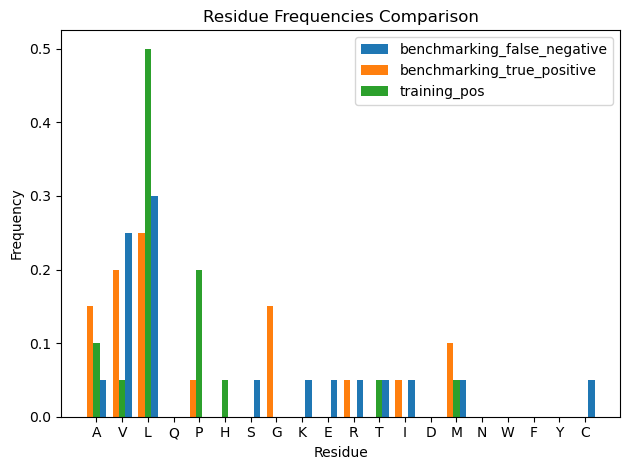

In [243]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar width
bar_width = 0.25  # Adjust the bar width as needed

# Calculate the x-axis positions for the bars
x_pos = np.arange(len(lst_aa))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for the first set of frequencies
bars1 = ax.bar(x_pos + bar_width, aa_frequency_fn, bar_width, label='benchmarking_false_negative')
# Create bars for the third set of frequencies
bars2 = ax.bar(x_pos - bar_width, aa_frequency_tp, bar_width, label='benchmarking_true_positive')
# Create bars for the second set of frequencies
bars3 = ax.bar(x_pos, aa_frequency_trp, bar_width, label='training_pos')


# Set labels and title
ax.set_xlabel('Residue')
ax.set_ylabel('Frequency')
ax.set_title('Residue Frequencies Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(lst_aa)
ax.legend()

# Display the histogram
plt.tight_layout()
plt.show()



In [252]:
### false negative analysis
df2 = pd.read_csv('fn_ids_svm.tsv', sep='\t')
df3 = pd.read_csv('tp_svm.tsv', sep='\t')
df4 = pd.read_csv('training_positive.tsv', sep='\t')

In [257]:
# retrieving the length of peptides from false negative benchmarking dataset
df2
signalp_length=[]
pept_l_fn=[]
pept_l1=[]
#to_remove =[]
for i in df2['Signal peptide']:
    signalp_length.append(i)
for j in range(len(signalp_length)):
    if signalp_length[j][10] != ".":
       if signalp_length[j][10] != "?":
            pept_l_fn.append(signalp_length[j][10])
            pept_l1.append(signalp_length[j][11])
for el in range(len(pept_l_fn)):
   pept_l_fn[el] = int(pept_l_fn[el]+pept_l1[el])
#for k in range(len(pept_l)):
 #   if pept_l[k] == '.':
 #       to_remove.append(k)
 #   if pept_l[k] == "?":
 #       to_remove.append(k)
print(len(pept_l_fn))

50


In [258]:
# retrieving the length of peptides from true positive benchmarking dataset
df3
signalp_length=[]
pept_l_tp=[]
pept_l1=[]
#to_remove =[]
for i in df3['Signal peptide']:
    signalp_length.append(i)
for j in range(len(signalp_length)):
    if signalp_length[j][10] != ".":
       if signalp_length[j][10] != "?":
            pept_l_tp.append(signalp_length[j][10])
            pept_l1.append(signalp_length[j][11])
for el in range(len(pept_l_tp)):
   pept_l_tp[el] = int(pept_l_tp[el]+pept_l1[el])
#for k in range(len(pept_l)):
 #   if pept_l[k] == '.':
 #       to_remove.append(k)
 #   if pept_l[k] == "?":
 #       to_remove.append(k)
print(len(pept_l_tp))

102


In [260]:
# retrieving the length of peptides from positive training dataset
df4
signalp_length=[]
pept_l_trp=[]
pept_l1=[]
#to_remove =[]
for i in df4['Signal peptide']:
    signalp_length.append(i)
for j in range(len(signalp_length)):
    if signalp_length[j][10] != ".":
       if signalp_length[j][10] != "?":
           if signalp_length[j][11] != ";":
            pept_l_trp.append(signalp_length[j][10])
            pept_l1.append(signalp_length[j][11])
for el in range(len(pept_l_trp)):
   pept_l_trp[el] = int(pept_l_trp[el]+pept_l1[el])
#for k in range(len(pept_l)):
 #   if pept_l[k] == '.':
 #       to_remove.append(k)
 #   if pept_l[k] == "?":
 #       to_remove.append(k)
print(len(pept_l_trp))

932


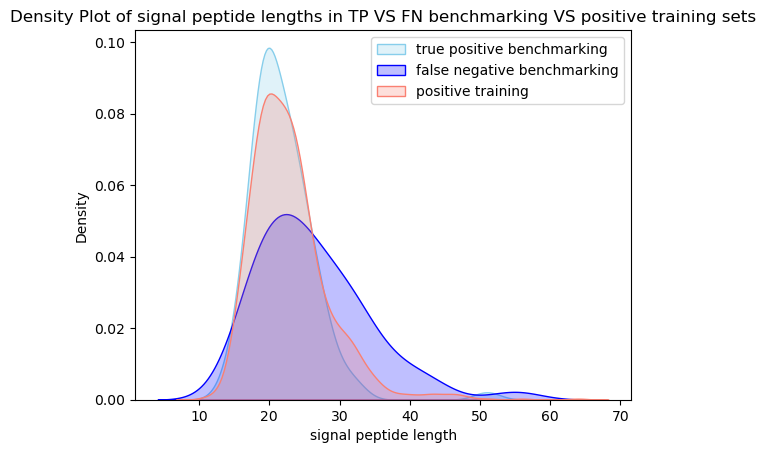

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a density plot with Seaborn
sns.kdeplot(pept_l_tp, color='skyblue', fill=True, label='true positive benchmarking')
sns.kdeplot(pept_l_fn, color='blue', fill=True, label='false negative benchmarking')
sns.kdeplot(pept_l_trp, color='salmon', fill=True, label='positive training')

# Adding labels and a legend
plt.xlabel('signal peptide length')
plt.ylabel('Density')
plt.title('Density Plot of signal peptide lengths in TP VS FN benchmarking VS positive training sets')
plt.legend()

# Showing the plot
plt.show()

In [220]:
df_tax_fp = pd.read_csv('fp_ids_svm.tsv', sep='\t')
df_tax_fp['Taxonomic lineage']= df_tax_fp['Taxonomic lineage'].str.extract(r'( [^,]*) \(kingdom\)')

In [223]:
df_tax_fn = pd.read_csv('fn_ids_svm.tsv', sep='\t')
df_tax_fn['Taxonomic lineage']= df_tax_fn['Taxonomic lineage'].str.extract(r'( [^,]*) \(kingdom\)')

In [ ]:
df_tax_fn['Taxonomic lineage'].fillna("other", inplace = True)

In [ ]:
df_tax_fn.groupby(['Taxonomic lineage']).count()

In [ ]:
df_tax_fp['Taxonomic lineage'].fillna("other", inplace = True)

In [222]:
df_tax_fp.groupby(['Taxonomic lineage']).count()

,From,Entry,Reviewed,Entry Name,Length,Signal peptide
Taxonomic lineage,,,,,,
Fungi,7,7,7,7,7,0
Metazoa,9,9,9,9,9,0
Viridiplantae,1,1,1,1,1,0


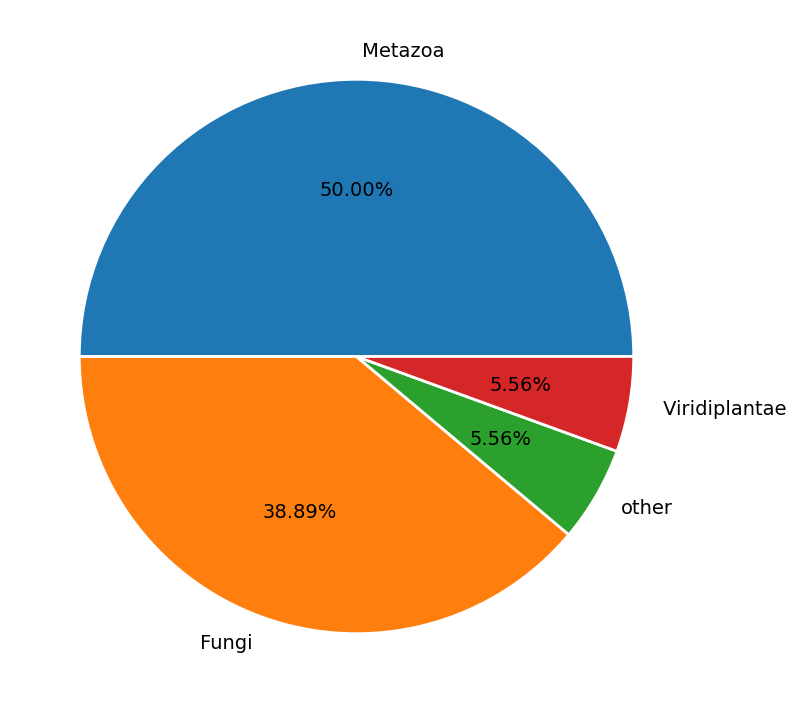

In [210]:
plt.figure(figsize = (9,9))
dbseries=df_tax_fp['Taxonomic lineage'].value_counts()
dbvalues=list(dbseries.values)
dbindex=list(dbseries.index)
plt.pie(dbvalues, labels=dbindex,autopct='%.2f%%', wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        textprops={'fontsize': 14})
plt.show()

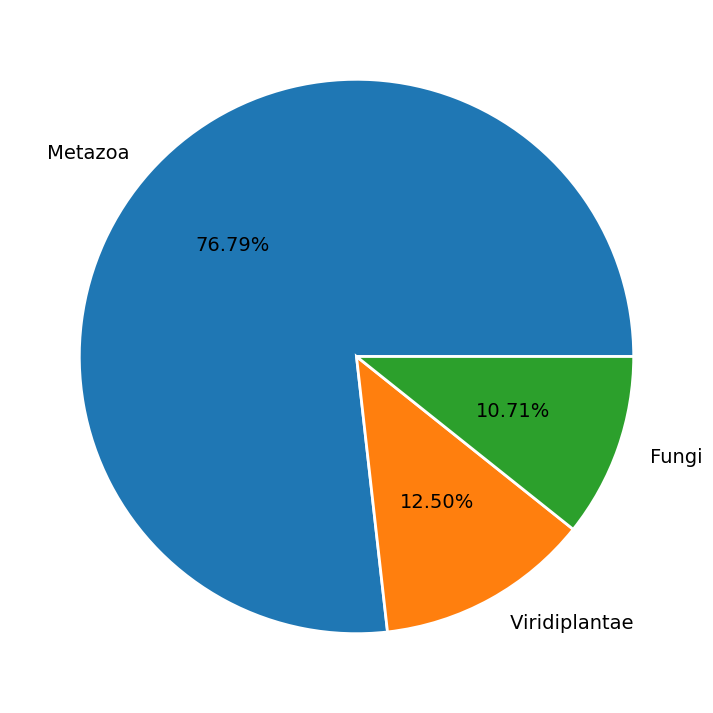

In [217]:
#Are the errors FN equally distributed among taxa/species?
plt.figure(figsize = (9,9))
dbseries=df_tax_fn['Taxonomic lineage'].value_counts()
dbvalues=list(dbseries.values)
dbindex=list(dbseries.index)
plt.pie(dbvalues, labels=dbindex,autopct='%.2f%%', wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        textprops={'fontsize': 14})
plt.show()

In [184]:
FPR = len(false_pos)/ (len(false_pos) + len(true_neg))
FNR = len(false_neg) / (len(false_neg) + len(true_pos))

In [186]:
print(FPR, FNR)

0.010714285714285714 0.35


In [187]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [191]:
fpr, tpr, thresholds = roc_curve(pept_label_b, y_pred_round_b)


In [189]:
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


AUC: 0.8196428571428571


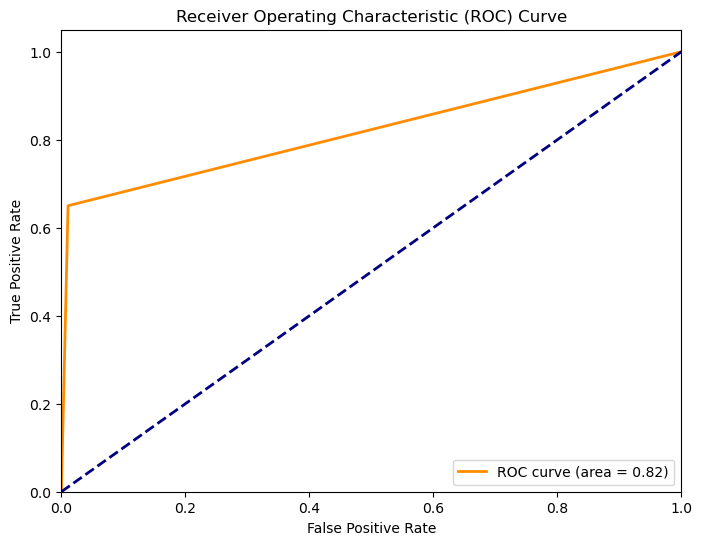

In [190]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
